<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Basic-idea" data-toc-modified-id="Basic-idea-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Basic idea</a></span></li><li><span><a href="#Requirements-and-Setup" data-toc-modified-id="Requirements-and-Setup-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Requirements and Setup</a></span></li><li><span><a href="#Input-(Please-Specify)" data-toc-modified-id="Input-(Please-Specify)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Input (Please Specify)</a></span></li><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Preparation</a></span><ul class="toc-item"><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Load Data</a></span></li><li><span><a href="#Extract-Data-and-Normalization" data-toc-modified-id="Extract-Data-and-Normalization-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Extract Data and Normalization</a></span></li><li><span><a href="#Compute-Distance-Matrix" data-toc-modified-id="Compute-Distance-Matrix-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Compute Distance Matrix</a></span></li></ul></li><li><span><a href="#Choose-Parameter" data-toc-modified-id="Choose-Parameter-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Choose Parameter</a></span><ul class="toc-item"><li><span><a href="#Auto-Parameter-Picker" data-toc-modified-id="Auto-Parameter-Picker-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Auto Parameter Picker</a></span></li><li><span><a href="#Parameter-scan" data-toc-modified-id="Parameter-scan-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Parameter scan</a></span></li><li><span><a href="#Specify-parameters-manually" data-toc-modified-id="Specify-parameters-manually-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Specify parameters manually</a></span></li></ul></li><li><span><a href="#Part-a)-Cluster-features-individual-using-CommonNN" data-toc-modified-id="Part-a)-Cluster-features-individual-using-CommonNN-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Part a) Cluster features individual using CommonNN</a></span></li><li><span><a href="#Part-b)-Cluster-all-features-together" data-toc-modified-id="Part-b)-Cluster-all-features-together-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Part b) Cluster all features together</a></span><ul class="toc-item"><li><span><a href="#get-state-matrix" data-toc-modified-id="get-state-matrix-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>get state matrix</a></span></li><li><span><a href="#One-hot-key-encoding" data-toc-modified-id="One-hot-key-encoding-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>One-hot key encoding</a></span></li><li><span><a href="#Cluster-Binding-Poses" data-toc-modified-id="Cluster-Binding-Poses-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Cluster Binding Poses</a></span></li></ul></li><li><span><a href="#Write-Trajectory-of-Each-Cluster" data-toc-modified-id="Write-Trajectory-of-Each-Cluster-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Write Trajectory of Each Cluster</a></span></li><li><span><a href="#2D-and-3D-visualization" data-toc-modified-id="2D-and-3D-visualization-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>2D and 3D visualization</a></span></li><li><span><a href="#Analysis" data-toc-modified-id="Analysis-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Analysis</a></span></li><li><span><a href="#Write-Pharmacophone" data-toc-modified-id="Write-Pharmacophone-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Write Pharmacophone</a></span></li></ul></div>

## Basic idea

Do a two-stage clustering:

  - a) Cluster individual superfeatures to obtained states within each interaction
  - b) Cluster all features together in a categorical state space

## Requirements and Setup

To view fill requirements to run this software please refer to requirment.txt

If any of the packages are not installed, you can intall with "!pip install package_name"

In [1]:
import matplotlib as mpl
import os
import ipynb_importer
import parsers, compute, visualize, clustering, write

importing Jupyter notebook from parsers.ipynb
importing Jupyter notebook from compute.ipynb
importing Jupyter notebook from visualize.ipynb


/home/yuxinliu/miniconda3/envs/thesis2/lib/python3.10/site-packages/MDAnalysis/coordinates/chemfiles.py:108: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  MIN_CHEMFILES_VERSION = LooseVersion("0.9")
/home/yuxinliu/miniconda3/envs/thesis2/lib/python3.10/site-packages/MDAnalysis/coordinates/TRJ.py:1209: DeprecationWarning: Please use `netcdf_file` from the `scipy.io` namespace, the `scipy.io.netcdf` namespace is deprecated.
  class NCDFPicklable(scipy.io.netcdf.netcdf_file):


importing Jupyter notebook from write.ipynb
importing Jupyter notebook from clustering.ipynb


In [2]:
# creat output folder
output_directory = './output/'
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# setup visualization params
mpl.rcParams["figure.dpi"] = 120
annotation_options = {
    "annotate_pos": "random",
    "annotate_props": {"fontweight": "bold"}
}

%matplotlib inline

## Input (Please Specify)

In [3]:
# pml_path = '/home/yuxinliu/5_clustering/dynophore_out_2022-02-07_13-31-34-HIV/dyno_dynophore.pml'
# pdb_path = "HIV.pdb"
# dcd_path = "HIV.dcd"
pml_path = '/home/yuxinliu/5_clustering/dynophore_out_2022-02-06_16-44-28-ZIKA/dyno_dynophore.pml'
dyno_path = "/home/yuxinliu/5_clustering/dynophore_out_2022-02-06_16-44-28-ZIKA/"
pdb_path = "ZIKA.pdb"
dcd_path = "ZIKA.dcd"

include_time = False

## Data Preparation

You may load, extract, normalize and preprocess the data with the magic line below.

In [ ]:
data, dynophore_dict = parsers.pre_process(pml_path, include_time = include_time)

Or you may also follow each separate steps below to prepare the data.

### Load Data

In [4]:
import numpy as np

dynophore_dict, _ = parsers.pml_to_dict(pml_path)

# overview number of frames per feature
{
    key: np.array([p["frame_ix"] for p in value["points"]]).shape[0]
    for key, value in dynophore_dict.items()
}

{'H[2947,2939,2948,2940,2945,2938]': 4903,
 'H[2946]': 4989,
 'PI[2933]': 5000,
 'PI[2944]': 4648,
 'AR[2939,2945,2947,2948,2940,2938]': 27,
 'HBA[2926]': 7818,
 'HBA[2941]': 232,
 'HBD[2928]': 160,
 'HBD[2931]': 444,
 'HBD[2933]': 3753,
 'HBD[2944]': 7627}

### Extract Data and Normalization

- xyz-coordinates and frame number (if include time influence) are extracted
- xyz-coordinates are normalized together to keep the relative proportion of the ranges

In [5]:
data = parsers.extract_norm(dynophore_dict)
data['HBD[2944]']["points"]

array([[1.        , 0.29642683, 0.96688577],
       [0.98299921, 0.2990823 , 0.94767543],
       [0.9491198 , 0.33557205, 0.9721344 ],
       ...,
       [0.81436496, 0.04236475, 0.56209137],
       [0.80491756, 0.05450979, 0.57719365],
       [0.80602106, 0.05513486, 0.57613053]])

In [6]:
data

{'H[2947,2939,2948,2940,2945,2938]': {'points': array([[0.86203539, 0.27473726, 0.9351541 ],
         [0.84332245, 0.3261077 , 0.90727307],
         [0.83365327, 0.29601412, 0.89517011],
         ...,
         [0.8856147 , 0.05997672, 0.80319308],
         [0.86881738, 0.08257904, 0.80855094],
         [0.8690758 , 0.08288243, 0.80899429]]),
  'frames': array([   0,    1,    2, ..., 4998, 4999, 5000]),
  'non_norm': array([[  2.634384,  -9.274565,   4.11705 ],
         [  2.254932,  -8.2329  ,   3.551692],
         [  2.058865,  -8.843123,   3.306274],
         ...,
         [  3.112514, -13.629376,   1.441208],
         [  2.771906, -13.171057,   1.549852],
         [  2.777146, -13.164905,   1.558842]])},
 'H[2946]': {'points': array([[0.87224812, 0.36383539, 0.95271228],
         [0.85039591, 0.42353451, 0.91896322],
         [0.84423332, 0.40428086, 0.90681804],
         ...,
         [0.88190167, 0.05124277, 0.77832055],
         [0.87933761, 0.07704216, 0.77791305],
         [0.8

### Compute Distance Matrix 

Distance matrix based on normalized data is calculated

In [7]:
data = compute.add_distance_mat(data, dynophore_dict, include_time = include_time)

print(data['HBD[2944]']["distances"].shape)

(4402, 4402)


## Choose Parameter

✌ Again, the magic line for predicting, adjusting and doing parameter scan for better choosing parameters are below.

The output will be the features, for which the computer failed to find suitable parameter. Please refer to step 5.2 adjusting parameters by your own

In [ ]:
please_manual = clustering.auto_cluster(data, dynophore_dict, include_time = include_time, only_result = False,
                                        plot_search_parameter = True, plot_clustering = True)
                                        
please_manual

### Auto Parameter Picker

Preliminary cluster parameter prediction and cluster number forcast based on data distribution.

Start adding parameter automatically. For feature with fewer points or noisy data, default parameters will be added.
Default parameter: radius_cutoff: 0.2, cnn_cutoff: 5, member_cutoff: 10


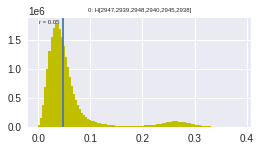

0 H[2947,2939,2948,2940,2945,2938]
min_frequency   min_cluster     radius   cnn_cutoff     
0.001           2               0.047    5              
--------------------------------------------------
Parameter predicted and added


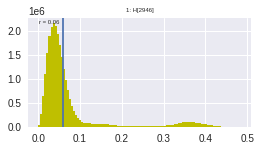

1 H[2946]
min_frequency   min_cluster     radius   cnn_cutoff     
0.0             2               0.058    15             
--------------------------------------------------
Parameter predicted and added


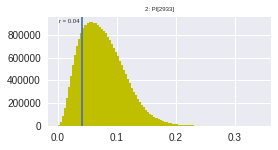

2 PI[2933]
min_frequency   min_cluster     radius   cnn_cutoff     
0               1               0.041    15             
--------------------------------------------------
Parameter predicted and added


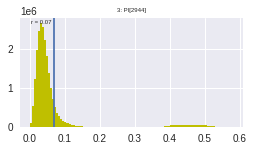

3 PI[2944]
min_frequency   min_cluster     radius   cnn_cutoff     
0.0             2               0.07     15             
--------------------------------------------------
Parameter predicted and added


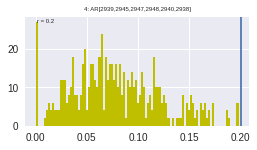

4 AR[2939,2945,2947,2948,2940,2938]
min_frequency   min_cluster     radius   cnn_cutoff     
0               0               0        15             
--------------------------------------------------
Parameter predicted and added


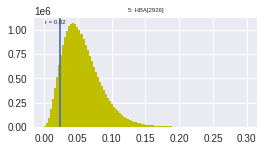

5 HBA[2926]
min_frequency   min_cluster     radius   cnn_cutoff     
0               1               0.024    15             
--------------------------------------------------
Parameter predicted and added


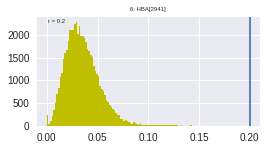

6 HBA[2941]
min_frequency   min_cluster     radius   cnn_cutoff     
0               0               0        15             
--------------------------------------------------
Parameter predicted and added


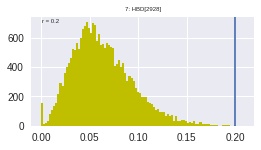

7 HBD[2928]
min_frequency   min_cluster     radius   cnn_cutoff     
0               0               0        15             
--------------------------------------------------
Parameter predicted and added


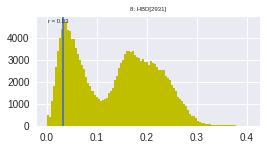

8 HBD[2931]
min_frequency   min_cluster     radius   cnn_cutoff     
0.007           2               0.032    3              
--------------------------------------------------
Parameter predicted and added


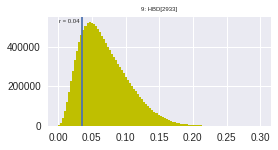

9 HBD[2933]
min_frequency   min_cluster     radius   cnn_cutoff     
0               1               0.036    15             
--------------------------------------------------
Parameter predicted and added


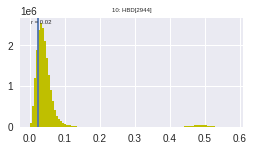

10 HBD[2944]
min_frequency   min_cluster     radius   cnn_cutoff     
0               2               0.023    15             
--------------------------------------------------
Parameter predicted and added


In [8]:
data = compute.add_auto_param(data, dynophore_dict, include_time)

### Parameter scan

With this function you may do the parameter scan for specific feature. This is function is time-consuming.

Idea: loop through different combination of parameters in reasonable range and suggest parameters.

In [9]:
new_params = clustering.parameter_scan(data, key='HBD[2931]')

  0%|                                                     | 0/5 [00:00<?, ?it/s]


UnboundLocalError: local variable 'cluster_' referenced before assignment

### Specify parameters manually

If you want to specify the data by you own, pelase feel free to do it here😊

You may also adjust the parameters later.

In [ ]:
data['HBD[2931]']["params"] = {
    "radius_cutoff": 0.05,
    "cnn_cutoff": 4,
    "member_cutoff": 2    
}

## Part a) Cluster features individual using CommonNN

You may play with steps 5 and 6 many times for getting satisfied result.

To save some time, you may specify the superfeature to re-cluster instead of the algorithsm re-run for all features.

0 H[2947,2939,2948,2940,2945,2938]
-----------------------------------------------------------------------------------------------
#points   r         c         min       max       #clusters %largest  %noise    time     
4903      0.047     5         10        None      2         0.958     0.002     00:00:2.125
-----------------------------------------------------------------------------------------------

1 H[2946]
-----------------------------------------------------------------------------------------------
#points   r         c         min       max       #clusters %largest  %noise    time     
4989      0.058     15        10        None      2         0.960     0.003     00:00:2.461
-----------------------------------------------------------------------------------------------

2 PI[2933]
-----------------------------------------------------------------------------------------------
#points   r         c         min       max       #clusters %largest  %noise    time     
5000    

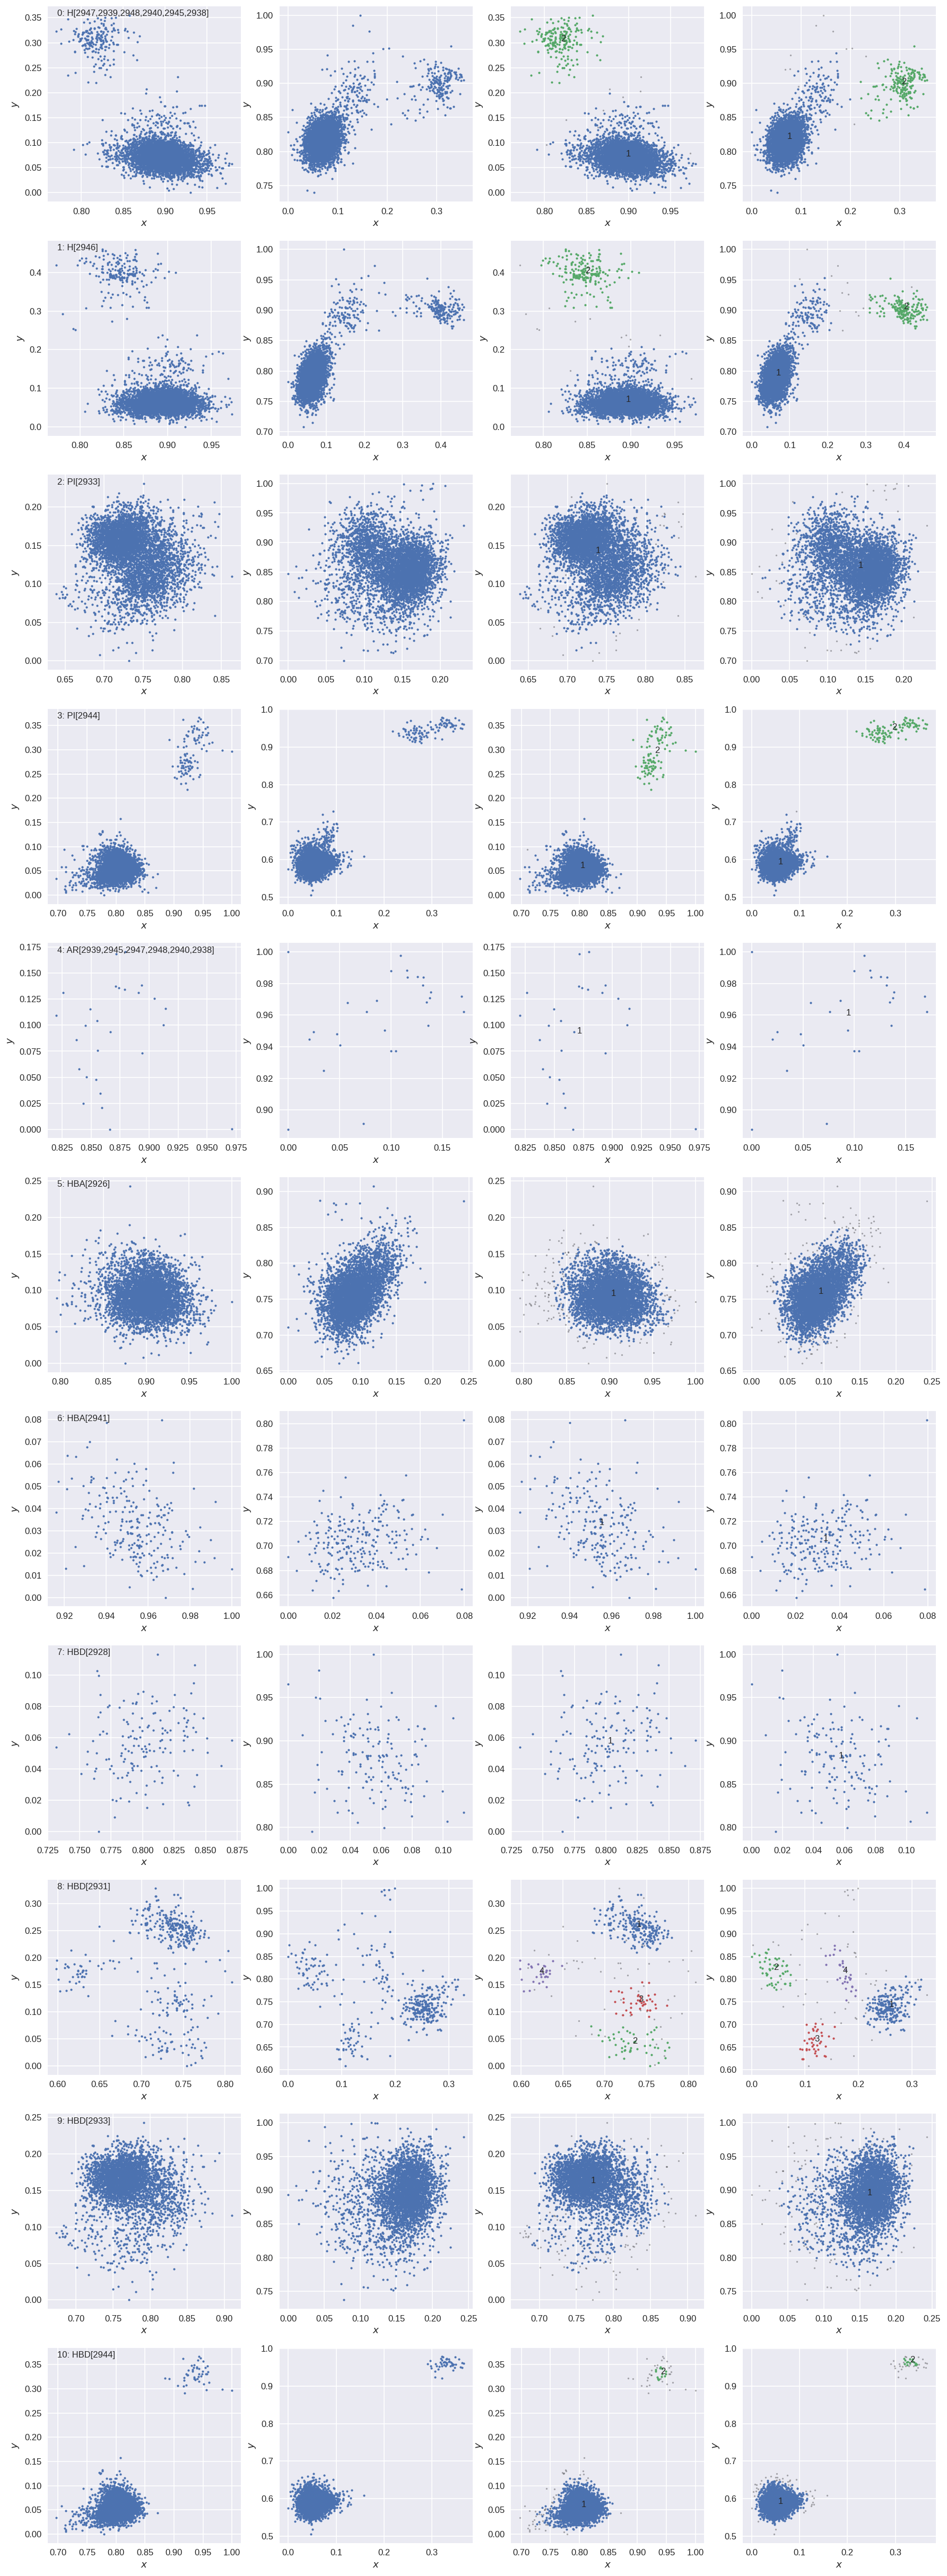

In [11]:
# specify "redo"
# redo = need_redo
# redo = ['HBD[2931]']

data, need_redo = clustering.do_cluster(data, include_time = False, plot = True, v = True)

In [12]:
need_redo

{'HBD[2931]': {'reasons': ['noise'], 'idx': 8}}

## Part b) Cluster all features together

Magic line for binding poses clustering based on the result from previous static clustering.

In [ ]:
pam = clustering.binding_state_cluster(data)

### get state matrix

In [13]:
state_matrix = compute.get_state_matrix(data)

print("State in 11 superfeatures:")
print("{:>9} {:>2} {:>2} {:>2} {:>2} {:>2} {:>2} {:>2} {:>2} {:>3} {:>2}".format('1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'))
state_matrix[:5]

State in 11 superfeatures:
        1  2  3  4  5  6  7  8  9  10 11


array([[2, 2, 1, 2, 0, 0, 0, 1, 0, 1, 0],
       [2, 2, 1, 2, 1, 0, 0, 0, 0, 0, 0],
       [2, 2, 1, 2, 1, 0, 0, 1, 0, 1, 0],
       [2, 2, 1, 2, 0, 0, 0, 1, 0, 1, 2],
       [2, 2, 1, 2, 1, 0, 0, 1, 0, 1, 2]])

In [14]:
state_matrix.shape

(5001, 11)

You may curious about the number states (onehot elements) per interaction

In [15]:
states_per_interaction = [max(x) + 1 for x in state_matrix.T]
states_per_interaction

[3, 3, 2, 3, 2, 2, 2, 2, 5, 2, 3]

### One-hot key encoding

The idea behind it is write 1 for being in a specific cluster in a feature, i.e. a state. For non-existing in other clusters or not belong to other features we code 0.

In [16]:
one_hot_matrix = compute.get_one_hot_encoding(state_matrix)
one_hot_matrix

array([[0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [17]:
one_hot_matrix.shape

(5001, 29)

### Cluster Binding Poses

Before deciding on the number of binding poses to cluster, let's have a look at the "inertia".

inertia: an indicator of the similarity with in each clusters.

100%|█████████████████████████████████████████████| 5/5 [00:10<00:00,  2.08s/it]


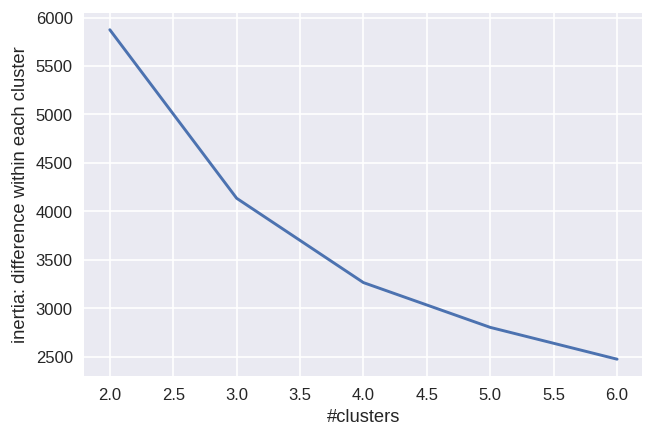

In [18]:
clustering.get_binding_pose_cluster_inertia(one_hot_matrix)

The function binding_state_cluster return an object of KMedoids clustering for further analysis,

You may see the prominent features for cluster centers

In [19]:
pam = clustering.binding_state_cluster(data, n_clusters = 3)

0 :
            H[2947,2939,2948,2940,2945,2938] state 1         
                                     H[2946] state 1         
                                    PI[2933] state 1         
                                    PI[2944] state 1         
           AR[2939,2945,2947,2948,2940,2938] state 0         
                                   HBA[2926] state 1         
                                   HBA[2941] state 0         
                                   HBD[2928] state 0         
                                   HBD[2931] state 0         
                                   HBD[2933] state 0         
                                   HBD[2944] state 1         
1 :
            H[2947,2939,2948,2940,2945,2938] state 2         
                                     H[2946] state 2         
                                    PI[2933] state 1         
                                    PI[2944] state 2         
           AR[2939,2945,2947,2948,2940,2938] state 0         


## Write Trajectory of Each Cluster

write.split_trajectory(pam, pdb_path, dcd_path)

## 2D and 3D visualization

First transform the data into compatible format for 2d and 3D visualization

You can try to interaction the the 3D plot.😉

In the end we will write trajectory of each binding pose into dcd file. You can feel free to inspect them with other softwares

In [38]:
wrap_data = parsers.get_wrap_data(data)

print(f"There are {len(wrap_data)} superfeatures.")
print("{:>15} {:>12} {:>12} {:>8} {:>20}".format('x', 'y', 'z', 'state', 'superfeature idx'))
wrap_data

There are 11 superfeatures.
              x            y            z    state     superfeature idx


[array([[  2.634384,  -9.274565,   4.11705 ,   2.      ,   0.      ],
        [  2.254932,  -8.2329  ,   3.551692,   2.      ,   0.      ],
        [  2.058865,  -8.843123,   3.306274,   2.      ,   0.      ],
        ...,
        [  3.112514, -13.629376,   1.441208,   1.      ,   0.      ],
        [  2.771906, -13.171057,   1.549852,   1.      ,   0.      ],
        [  2.777146, -13.164905,   1.558842,   1.      ,   0.      ]]),
 array([[  4.377498,  -8.289847,   6.382301,   2.      ,   1.      ],
        [  3.83304 ,  -6.802415,   5.541427,   2.      ,   1.      ],
        [  3.679496,  -7.282129,   5.238824,   2.      ,   1.      ],
        ...,
        [  4.618021, -16.078241,   2.037248,   1.      ,   1.      ],
        [  4.554136, -15.435437,   2.027095,   1.      ,   1.      ],
        [  4.575342, -15.447514,   2.053033,   1.      ,   1.      ]]),
 array([[ -3.3380547, -11.96756  ,  -1.4834137,   1.       ,   2.       ],
        [ -3.4409454, -12.304478 ,  -1.3002375,   1.   

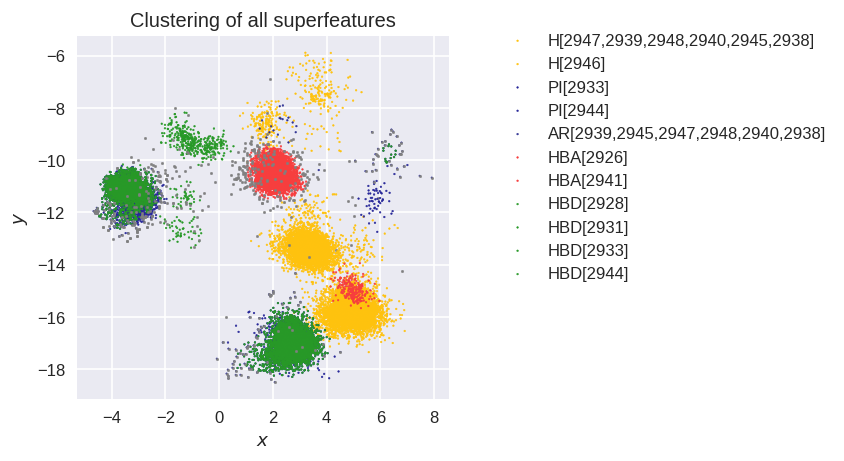

In [39]:
visualize.draw_2d_wrap_data(data, dynophore_dict, wrap_data)

<IPython.core.display.Javascript object>


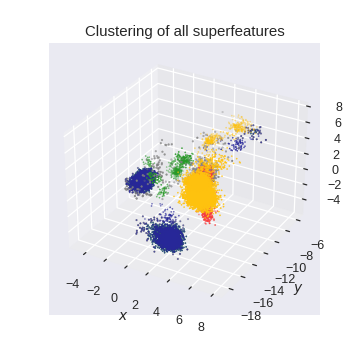

In [40]:
visualize.draw_3d_wrap_data(data, dynophore_dict, wrap_data)

## Analysis

If you used the magic lines, you may need to run the codes below. For detailed instruction on codes below, please refer to steps before.

In [ ]:
state_matrix = compute.get_state_matrix(data)
state_matrix.shape

Let's start result analysis! 😊

In [27]:
state_statistis = compute.get_state_statistis(pam, data, dynophore_dict)

print("This dict contains all statistis of the result.")
state_statistis

This dict contains all statistis of the result.


{0: {0: {0: 21, 1: 1253, 2: 4},
  1: {0: 11, 1: 1266, 2: 1},
  2: {0: 31, 1: 1247},
  3: {0: 95, 1: 1183},
  4: {0: 1278},
  5: {0: 65, 1: 1213},
  6: {0: 1211, 1: 67},
  7: {0: 1278},
  8: {0: 1249, 1: 8, 2: 6, 3: 13, 4: 2},
  9: {0: 1278},
  10: {0: 181, 1: 1097}},
 1: {0: {0: 3, 1: 1, 2: 190},
  1: {0: 8, 2: 186},
  2: {0: 15, 1: 179},
  3: {0: 90, 2: 104},
  4: {0: 167, 1: 27},
  5: {0: 189, 1: 5},
  6: {0: 194},
  7: {0: 44, 1: 150},
  8: {0: 170, 2: 2, 4: 22},
  9: {0: 80, 1: 114},
  10: {0: 180, 2: 14}},
 2: {0: {0: 85, 1: 3444},
  1: {0: 7, 1: 3522},
  2: {1: 3529},
  3: {0: 169, 1: 3360},
  4: {0: 3529},
  5: {0: 184, 1: 3345},
  6: {0: 3364, 1: 165},
  7: {0: 3529},
  8: {0: 3221, 1: 231, 2: 41, 3: 28, 4: 8},
  9: {1: 3529},
  10: {0: 334, 1: 3195}}}

In [37]:
feature_per_state = compute.get_feature_freq_per_state(state_statistis, data)

print("This dict contains the superfeature frequency in each binding pose. You will use this dict to generating radar plot.")
feature_per_state

This dict contains the superfeature frequency in each binding pose. You will use this dict to generating radar plot.


{0: {0: 0.2514,
  1: 0.2534,
  2: 0.2494,
  3: 0.2366,
  4: 0.0,
  5: 0.2426,
  6: 0.0134,
  7: 0.0,
  8: 0.0058,
  9: 0.0,
  10: 0.2194},
 1: {0: 0.0382,
  1: 0.0372,
  2: 0.0358,
  3: 0.0208,
  4: 0.0054,
  5: 0.001,
  6: 0.0,
  7: 0.03,
  8: 0.0048,
  9: 0.0228,
  10: 0.0028},
 2: {0: 0.6888,
  1: 0.7044,
  2: 0.7058,
  3: 0.672,
  4: 0.0,
  5: 0.669,
  6: 0.033,
  7: 0.0,
  8: 0.0616,
  9: 0.7058,
  10: 0.639}}

In [36]:
interact_summary = compute.get_interact_summary(data, pam, dynophore_dict)

print("Interaction frequency within each binding pose")
interact_summary

Interaction frequency within each binding pose


,0,1,2,feature
0,0.2514,0.0382,0.6888,"H[2947,2939,2948,2940,2945,2938]"
1,0.2534,0.0372,0.7044,H[2946]
2,0.2494,0.0358,0.7058,PI[2933]
3,0.2366,0.0208,0.6720,PI[2944]
4,0.0000,0.0054,0.0000,"AR[2939,2945,2947,2948,2940,2938]"
5,0.2426,0.0010,0.6690,HBA[2926]
6,0.0134,0.0000,0.0330,HBA[2941]
7,0.0000,0.0300,0.0000,HBD[2928]
8,0.0058,0.0048,0.0616,HBD[2931]
9,0.0000,0.0228,0.7058,HBD[2933]


There are 3 clusters
Frames within each binding state: {1: 194, 0: 1278, 2: 3529}


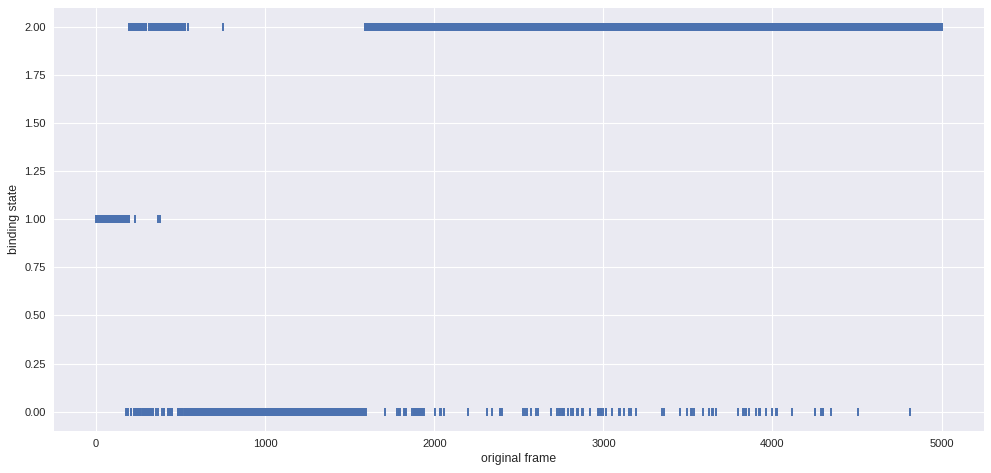

In [29]:
visualize.plot_bar_code(pam)

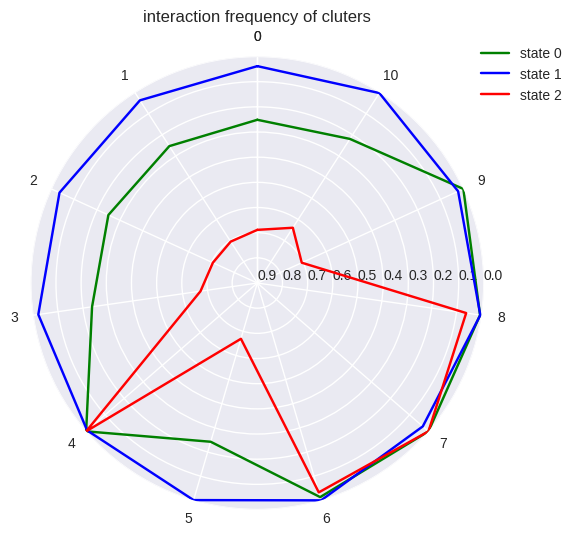

In [30]:
visualize.plot_radar(feature_per_state, xmin = 0, xmax = 0.9)

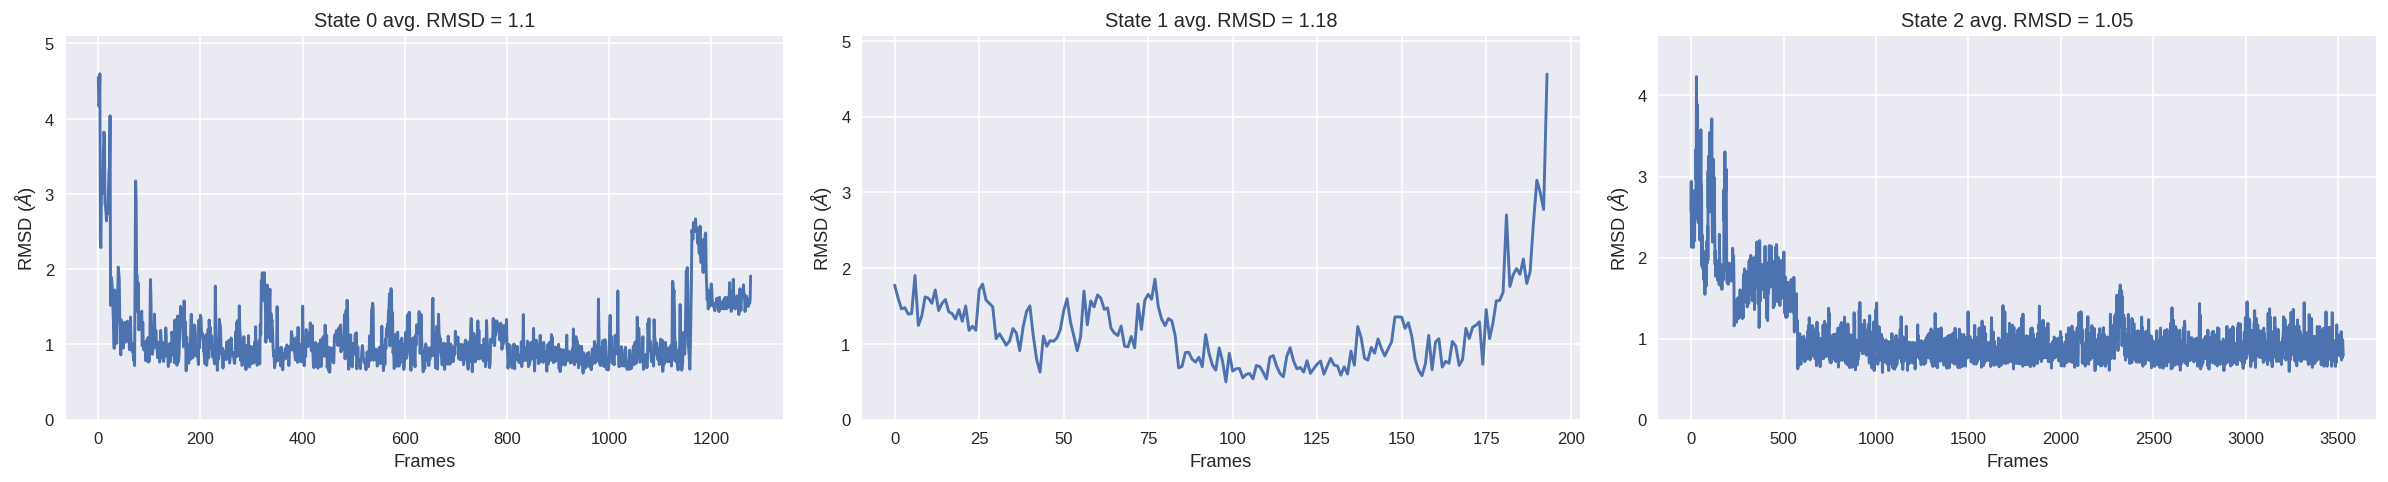

In [31]:
visualize.plot_cluster_rmsd(pam, pdb_path, select = 'chainID X')

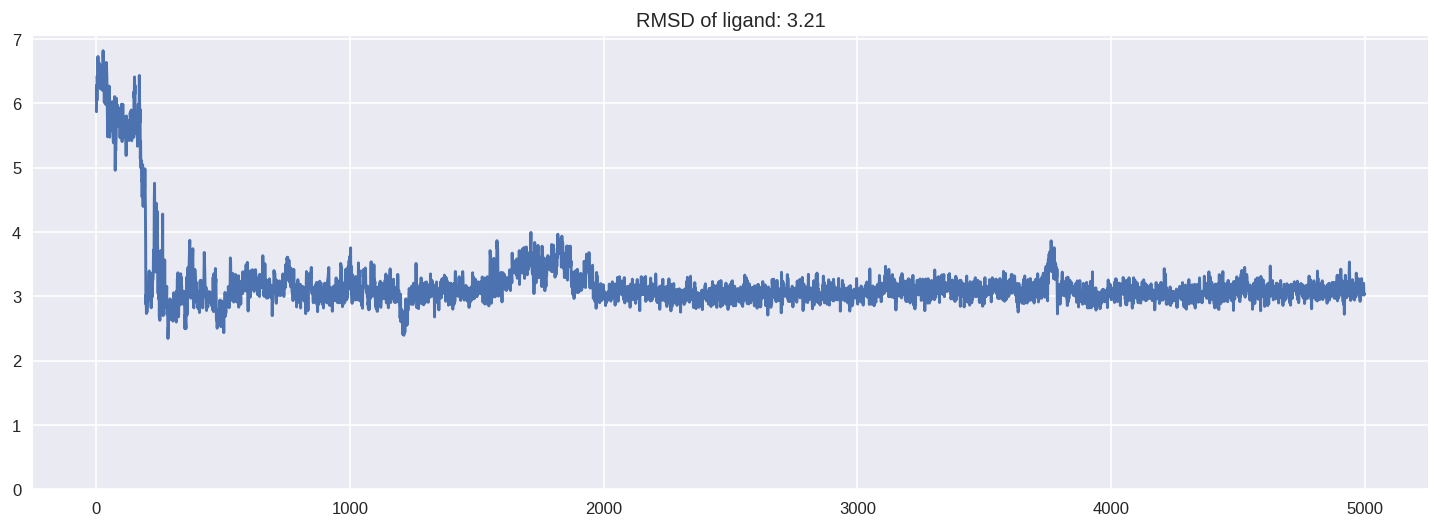

In [32]:
visualize.plot_whole_rmsd(pdb_path, dcd_path, select = 'chainID X', alignment = True, n_drop = 0)

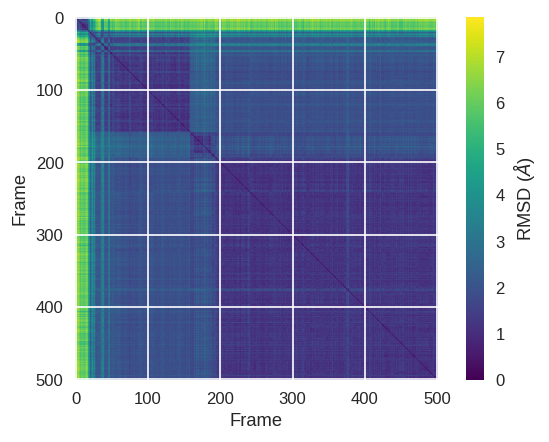

In [33]:
diffusion_matrix = visualize.plot_diffusionmap(pdb_path, dcd_path, reduce = True)

## Write Pharmacophone

A nice function here!🙌

You may only need most frequent pharmacophones. Here you have an option set the frequency threshold for computer to get the desirable output for you!

In [ ]:
frequency_cutoff = {'H': 0.1, 'AR': 0.03, 'HA2': 0.2, 'HD2': 0.2, 'HDA': 0.2,
                            'HBD': 0.2, 'HBA': 0.2, 'HA': 0.2, 'HD': 0.2, 'HI': 0.2, 'PI': 0.2, 'NI': 0.2}

In [41]:
features = write.extract_superfeature(wrap_data, dynophore_dict, pdb_path, pml_path, dyno_path, include_time = include_time)

print('These are the features, which will be written into output file.')
features

These are the features, which will be written into output file.


[[1,
  'H',
  'M',
  array([ 1.780983, -9.01564 ,  3.406885]),
  1.5,
  array([ 6.2495    , -9.83192857,  1.81907143]),
  0.0,
  1.0],
 [2,
  'H',
  'M',
  array([  3.1064215, -12.8268765,   2.232993 ]),
  1.5,
  array([ 6.2495    , -9.83192857,  1.81907143]),
  0.0,
  1.0],
 [3,
  'H',
  'M',
  array([  3.156289 , -11.803981 ,   3.8095615]),
  1.5,
  array([ 6.2495    , -9.83192857,  1.81907143]),
  0.0,
  1.0],
 [4,
  'H',
  'M',
  array([ 3.9056515, -7.7733525,  5.3603385]),
  1.5,
  array([ 5.51918519, -6.99322222,  4.23977778]),
  0.0,
  1.0],
 [5,
  'H',
  'M',
  array([  4.8160105, -14.7631015,   3.338252 ]),
  1.5,
  array([ 5.51918519, -6.99322222,  4.23977778]),
  0.0,
  1.0],
 [6,
  'H',
  'M',
  array([  4.3504515, -10.5677605,   5.9059065]),
  1.5,
  array([ 5.51918519, -6.99322222,  4.23977778]),
  0.0,
  1.0],
 [7,
  'PI',
  'M',
  array([ -3.31019495, -11.572311  ,  -1.80753465]),
  1.5,
  array([ -3.26366667, -11.0735    ,  -3.927     ]),
  0.0,
  1.0],
 [8,
  'PI',
  

In [42]:
write.pharmacophore_writer(data, dynophore_dict, pdb_path, pml_path, dyno_path, include_time = include_time)

Pharmacophore successfully written into pml file.
